In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Load Dataset
glass=pd.read_csv("D:\\zexcelR\\DS Assignments\\Assignment13\\glass.csv")

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Length: 213, dtype: int64

In [6]:
array=glass.values
X=array[:,0:9]

In [7]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [8]:
Y=array[:,9]

In [9]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [10]:
kfold=KFold(n_splits=10)

In [11]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [12]:
model = KNeighborsClassifier(n_neighbors=18)
results = cross_val_score(model, X, Y, cv=kfold)

In [13]:
print(results.mean())

0.4426406926406926


In [14]:
#Grid Search Algorithm Tuning 
n_neighbors=np.array(range(1,80))
param_grid=dict(n_neighbors=n_neighbors)

In [15]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [16]:
print(grid.best_score_)

0.640531561461794


In [17]:
print(grid.best_params_)

{'n_neighbors': 1}


Text(0, 0.5, 'Cross-Validate Accuracy')

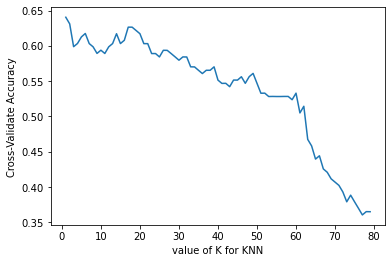

In [18]:
#Visualize countvectorizer Results
get_ipython().run_line_magic('matplotlib','inline')
#choose value of k from 1 to 80
k_range=range(1,80)
k_scores=[]
#use iterations to calculate different k in models,then return the average accuracy based on cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validate Accuracy')